# Objective

The primary objective of this notebook is to build a logistic regression model to predict whether an individual is a smoker based on features like age, sex, BMI, number of children, region, and insurance charges. This involves loading and preprocessing the data, exploratory data analysis, feature encoding, data normalization, model training and evaluation, and making predictions.

# Steps Overview
1. Load the Dataset: Import the necessary libraries and load the dataset to understand its structure.
2. Data Preprocessing:
    * Encode categorical variables to transform non-numeric columns into numerical values.
    * Visualize correlations between features to gain insights.
3. Model Building:
    * Split the dataset into features (X) and target (y).
    * Further split the data into training and testing sets.
    * Normalize the feature set to improve model performance.
    * Train a logistic regression model.
4. Model Evaluation:
    - Predict the target variable for the test set.
    - Evaluate the model's performance using accuracy score, confusion matrix, and classification report.
5. Make Predictions: Use the trained model to make predictions on new data.

## 1. Load the Dataset

In [6]:
import pandas as pd

# Load the dataset
file_path = './datasets/insurance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## 2. Data Preprocessing

In [8]:
# Display unique values in 'region' column to understand its distribution
data['region'].unique()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])


Categorical variables such as 'sex', 'smoker', and 'region' are encoded into numerical values to facilitate their use in the logistic regression model.

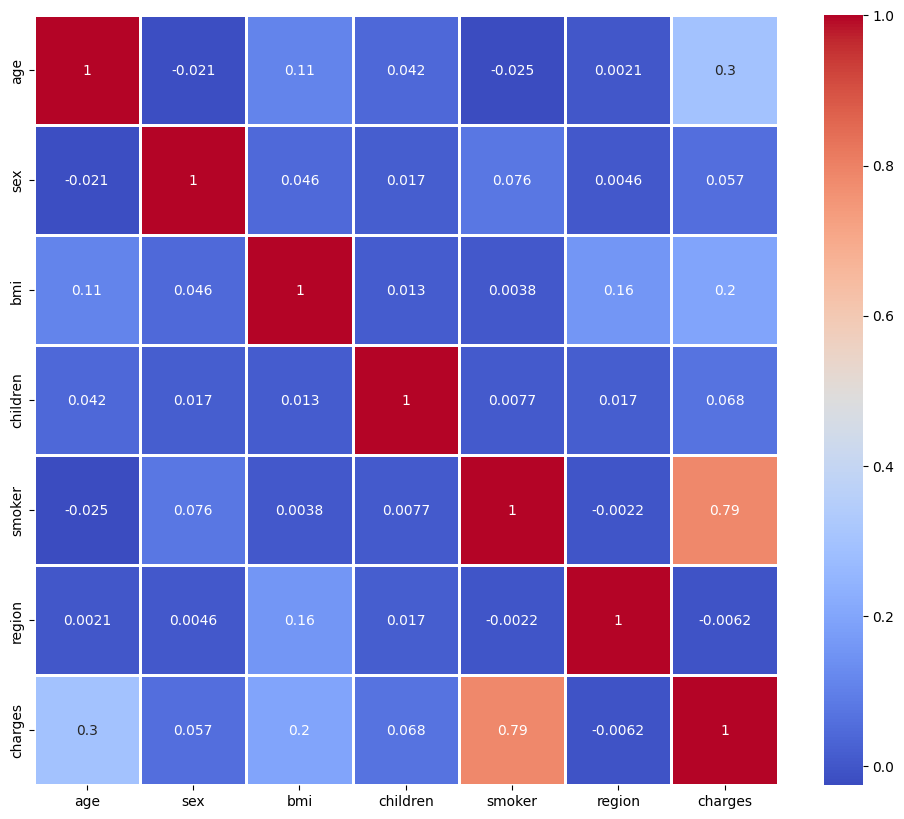

In [9]:
# Plot the heatmap to visualize feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()


A heatmap is plotted to visualize the correlation between different features in the dataset. This helps in understanding the relationship between variables.

Keep in mind correlations between variables is unwanted, only correlations with the variable we want to predict is good (0.79 in this case).

In [10]:
data.head(10)

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       1   7281.50560
8   37    1  29.830         2       0       0   6406.41070
9   60    0  25.840         0       0       1  28923.13692

## 3. Model Building

In [11]:
# Splitting the dataset into features and target
X = data.drop('smoker', axis=1)
y = data['smoker']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The dataset is split into features (X) and the target variable (y), and further into training and testing sets. Feature scaling is applied to normalize the data.

In [12]:
# Fit the logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

A logistic regression model is trained using the scaled training data.

## 4. Model Evaluation

In [13]:
# Predict and evaluate the model
y_pred = log_reg.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))


0.9589552238805971
[[208   5]
 [  6  49]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.91      0.89      0.90        55

    accuracy                           0.96       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



The model's performance is evaluated using accuracy score, confusion matrix, and classification report to understand its effectiveness in predicting whether an individual is a smoker.

## 5. Make Predictions

In [14]:
# Predict on new data
log_reg.predict(scaler.transform([[45, 0, 50, 2, 0, 100000]]))


d:\python_files\venvs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

Finally, the trained model is used to make predictions on new data. This step demonstrates how the model can be applied to predict the smoking status of individuals based on their features.

You'll notice that the only variable that really influences the output is charges (which makes sense since it is so correlated). Changing the other variables has very little effect.

In [15]:
import pandas as pd

# Load the dataset
file_path = './datasets/insurance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [16]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## 2. Data Preprocessing

In [17]:
# Display unique values in 'region' column to understand its distribution
data['region'].unique()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])


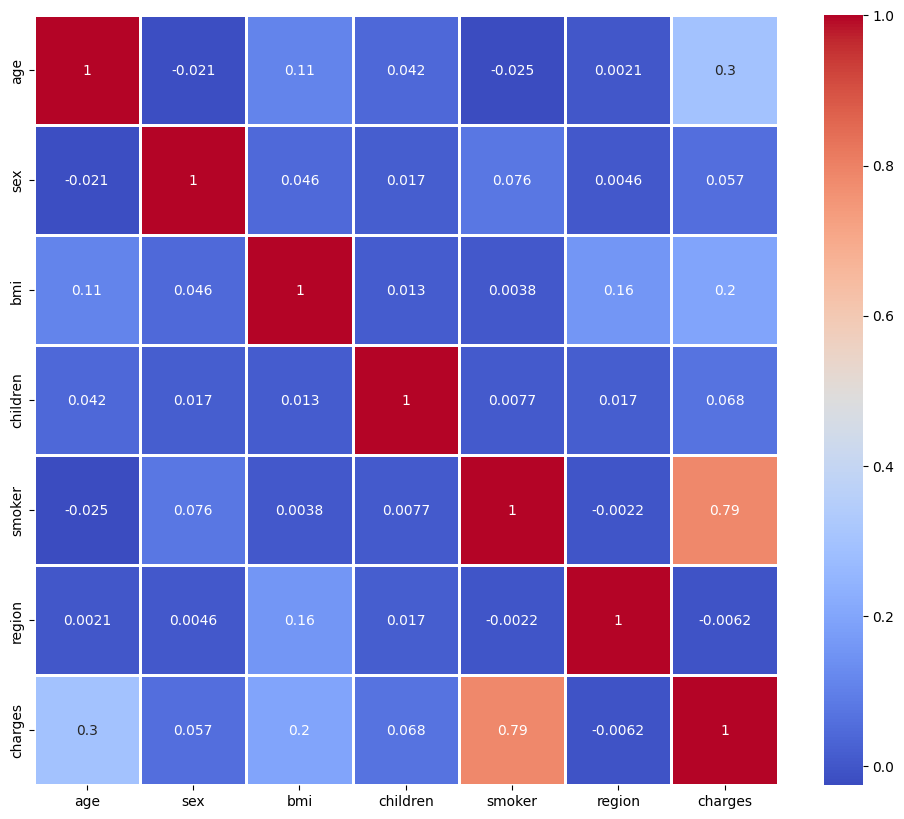

In [18]:
# Plot the heatmap to visualize feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()


In [19]:
# Encode categorical columns
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

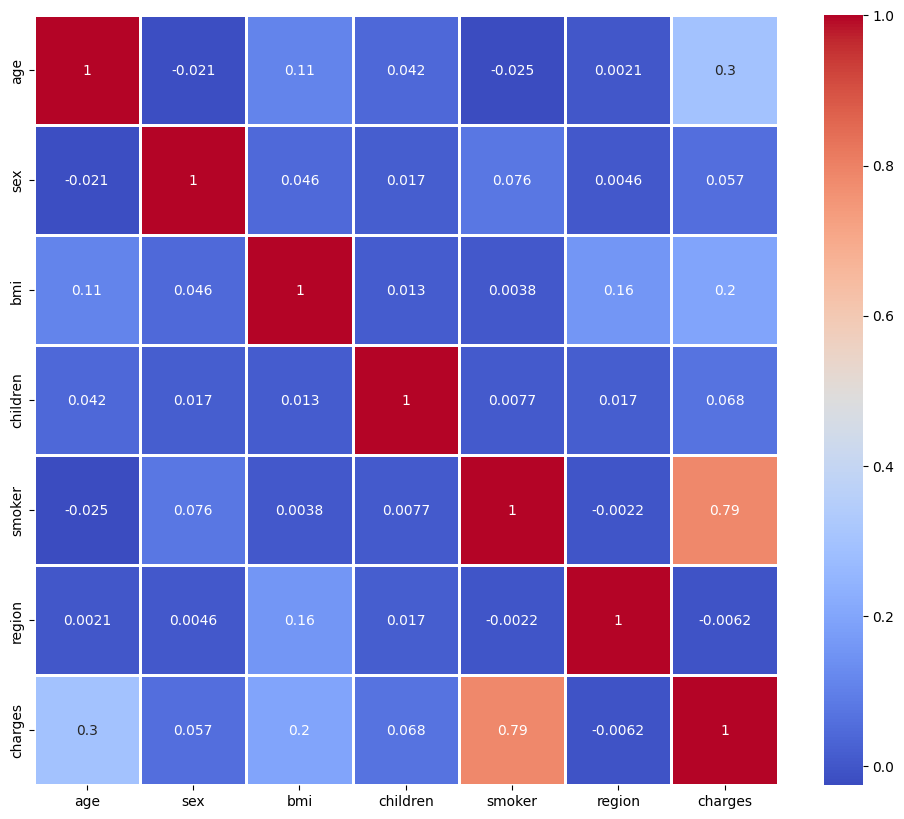

In [20]:
# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()


In [21]:
data['region'].unique()

array([3, 2, 1, 0], dtype=int64)

In [22]:
data.head(10)

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       1   7281.50560
8   37    1  29.830         2       0       0   6406.41070
9   60    0  25.840         0       0       1  28923.13692

In [23]:
# Splitting the dataset into features and target
X = data.drop('smoker', axis=1)
y = data['smoker']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
data.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010

In [25]:
X.head()

age  sex     bmi  children  region      charges
0   19    0  27.900         0       3  16884.92400
1   18    1  33.770         1       2   1725.55230
2   28    1  33.000         3       2   4449.46200
3   33    1  22.705         0       1  21984.47061
4   32    1  28.880         0       1   3866.85520

In [26]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [27]:
# Fit the logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
# Predict and evaluate the model
y_pred = log_reg.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))


0.9589552238805971
[[208   5]
 [  6  49]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.91      0.89      0.90        55

    accuracy                           0.96       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



# Fit the logistic regression model

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [31]:
y_test

764     0
887     0
890     1
1293    0
259     1
       ..
109     1
575     0
535     0
543     1
846     0
Name: smoker, Length: 268, dtype: int64

In [32]:
accuracy_score(y_pred, y_test)

0.9589552238805971

In [33]:
confusion_matrix(y_pred, y_test)

array([[208,   5],
       [  6,  49]], dtype=int64)

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.91      0.89      0.90        55

    accuracy                           0.96       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



In [35]:
X_test.head()

age  sex     bmi  children  region      charges
764    45    0  25.175         2       0   9095.06825
887    36    0  30.020         0       1   5272.17580
890    64    0  26.885         0       1  29330.98315
1293   46    1  25.745         3       1   9301.89355
259    19    1  31.920         0       1  33750.29180

In [36]:
# predict only on a single row
log_reg.predict(scaler.transform([[45, 0, 50, 2, 0, 100000]]))

d:\python_files\venvs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)